In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [4]:
df = pd.read_csv('seeds_dataset.csv')

In [5]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
df.dtypes

Area                       float64
Perimeter                  float64
Compactness                float64
Length_of_kernel           float64
Width_of_kernel            float64
Asymmetry_coefficient      float64
Length_of_kernel_groove    float64
Class                        int64
dtype: object

In [7]:
df.describe()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
df.Classass.value_counts() # Balanced dataset

1    70
2    70
3    70
Name: Class, dtype: int64

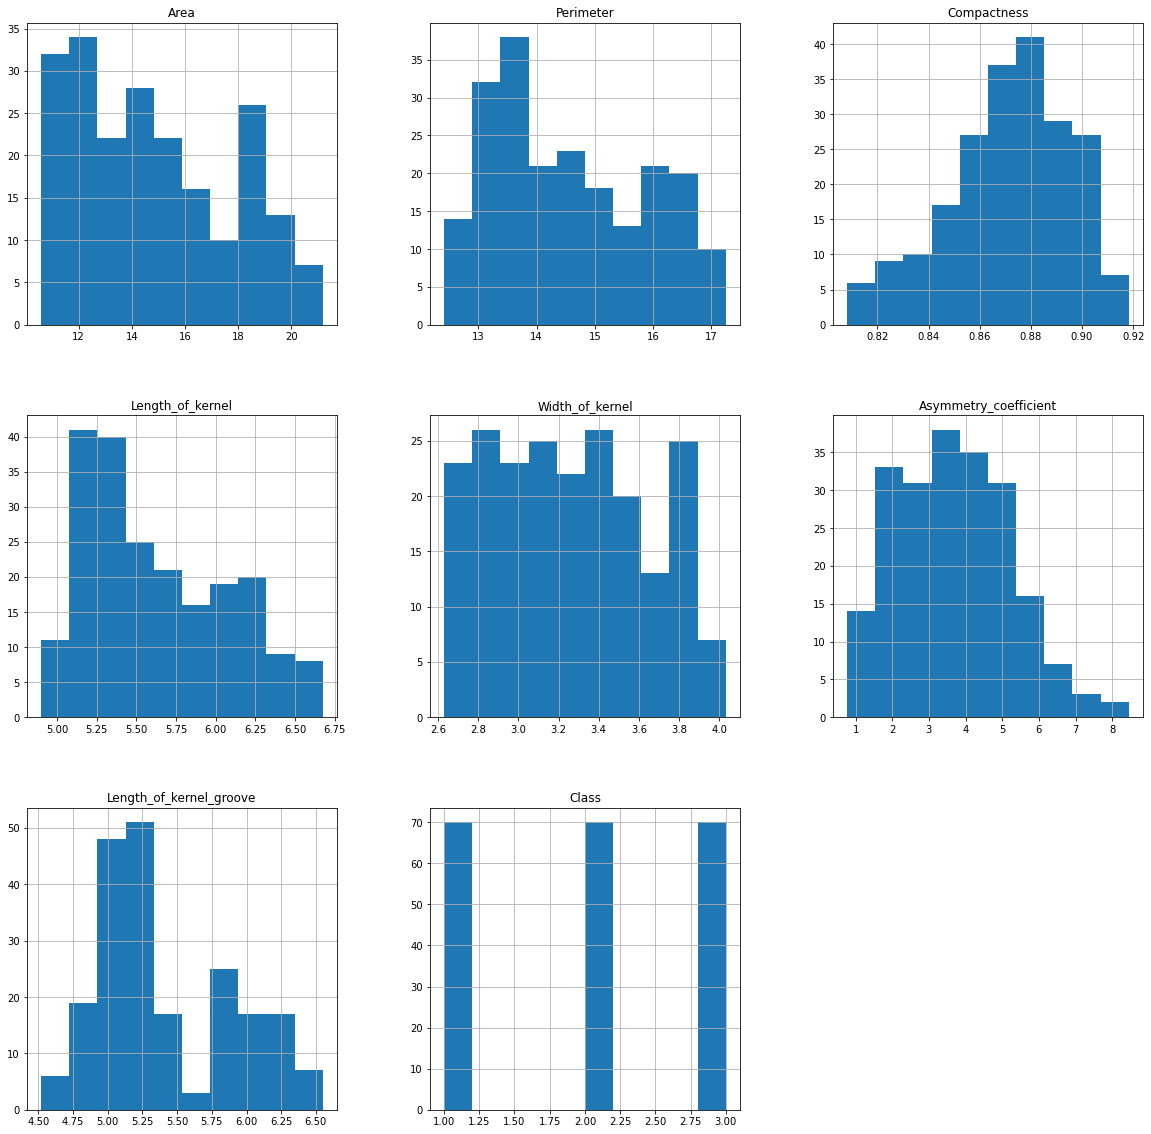

In [10]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

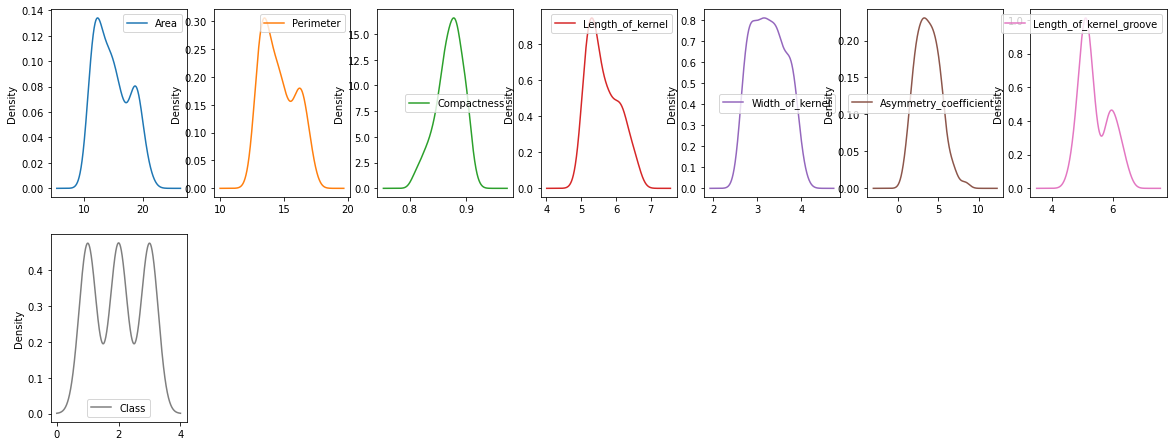

In [11]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [12]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class                      0
dtype: int64

In [13]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class                      0
dtype: int64

In [14]:
duplicate_values = df[df.duplicated()]
duplicate_values

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class


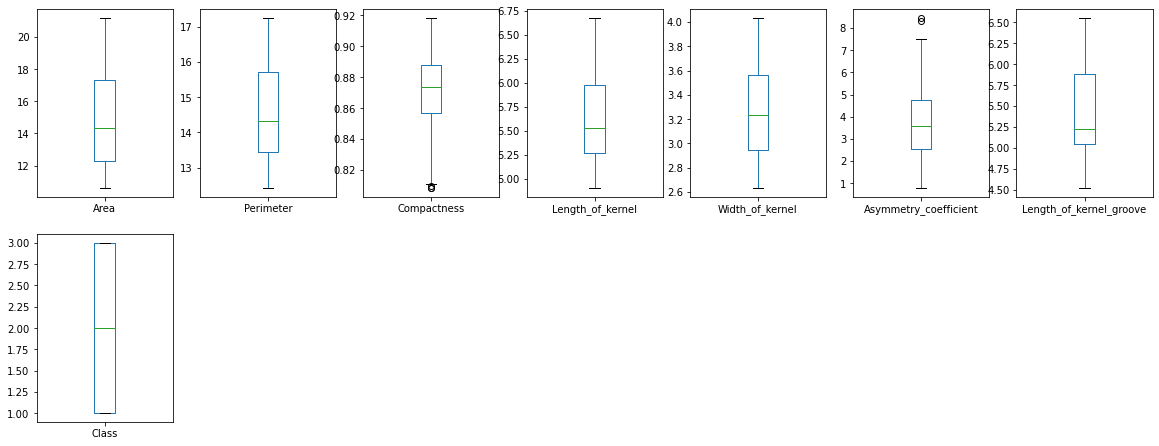

In [15]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [19]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'Class').index
columns

Index(['Class', 'Asymmetry_coefficient', 'Length_of_kernel_groove',
       'Length_of_kernel', 'Perimeter'],
      dtype='object')

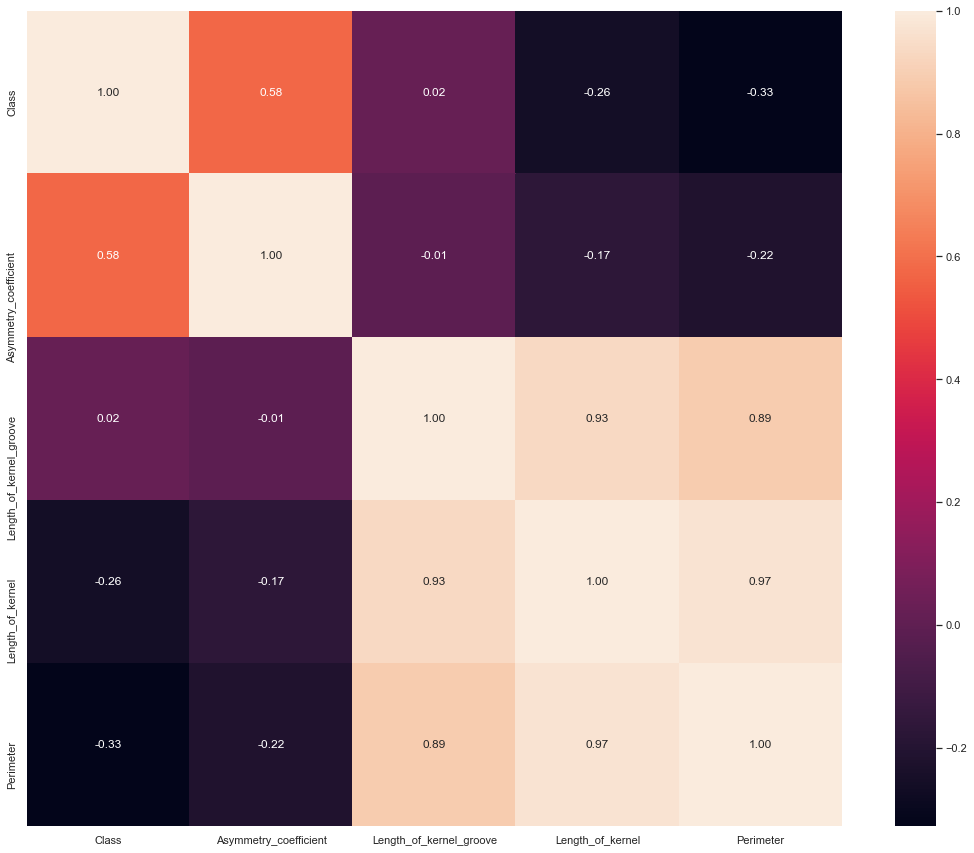

In [20]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [22]:
values = df.values

X = values[:,0:7]
Y = values[:,7]

##### Feature Scaling 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [25]:
df_scaled = pd.DataFrame(X_scaled)

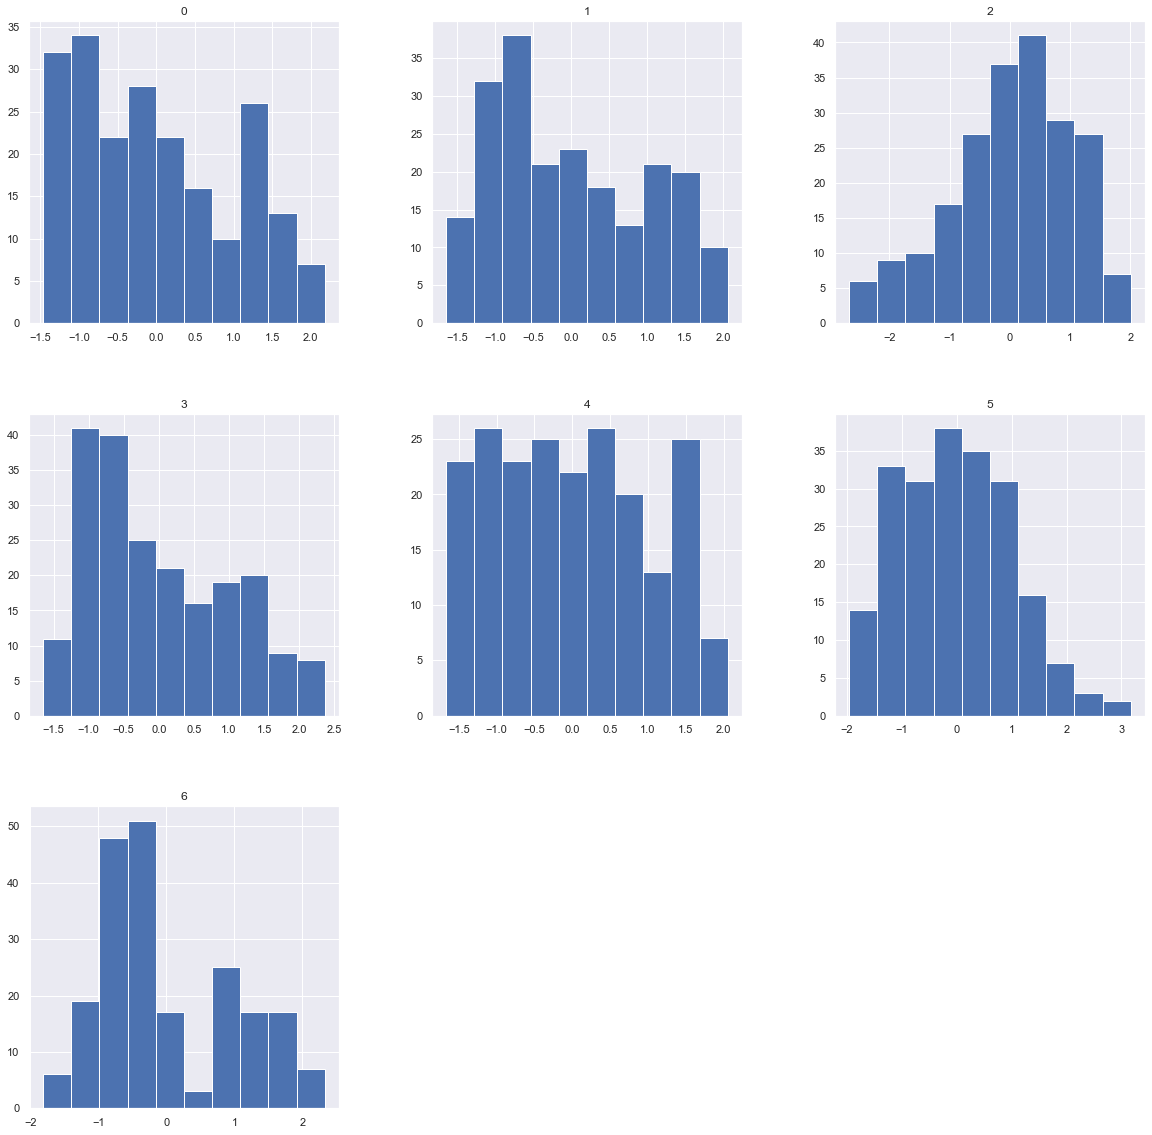

In [26]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.932949 (+/- 0.062061)
LDA: 0.964463 (+/- 0.045036)
kNN: 0.931205 (+/- 0.053813)
 DT: 0.912044 (+/- 0.051933)
 NB: 0.901223 (+/- 0.067870)
SVM: 0.926197 (+/- 0.057565)
 RF: 0.926690 (+/- 0.053766)
 GB: 0.936584 (+/- 0.046052)
XGB: 0.930766 (+/- 0.047681)
AdaBoost: 0.605332 (+/- 0.085529)
ANN: 0.917100 (+/- 0.066458)


In [59]:
def cv_res (results):
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 

            x.append(sum/5)
            sum=0
    return x

In [60]:
cv_res(results[10])

[0.976959336959337,
 0.9783061383061383,
 0.9776223776223777,
 0.976959336959337,
 0.9569097569097569,
 0.9756125356125356,
 0.9888111888111888,
 0.9741798941798943,
 0.9888111888111888,
 0.9756125356125356]

In [28]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [29]:
X_noise = noise(X_scaled)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.881342 (+/- 0.069789)
LDA: 0.893897 (+/- 0.068911)
kNN: 0.878152 (+/- 0.072689)
 DT: 0.762053 (+/- 0.082648)
 NB: 0.872571 (+/- 0.071722)
SVM: 0.882897 (+/- 0.067739)
 RF: 0.867870 (+/- 0.072370)
 GB: 0.844793 (+/- 0.078462)
XGB: 0.850043 (+/- 0.067782)
AdaBoost: 0.719747 (+/- 0.129987)
ANN: 0.880178 (+/- 0.071966)


In [32]:
## Or with another way 

In [31]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [32]:
X_n = noise(X_scaled)

In [33]:
X_n

array([[ 0.16348251,  0.53493701,  0.08182468, ..., -0.16134784,
        -0.7002347 , -0.86564399],
       [ 0.23259013, -0.41719033,  0.17005656, ...,  0.22217115,
        -1.96875324, -0.78128853],
       [-0.27924521, -0.80430801,  0.63672232, ...,  1.21635747,
        -1.36569604, -1.00680453],
       ...,
       [-0.72241579, -1.36244006,  0.10422386, ...,  0.20287564,
         3.54860528, -0.67393752],
       [-0.68853847, -1.10883155, -1.42408894, ..., -0.42782722,
        -0.17729853, -0.57386835],
       [-1.83725873, -0.1785154 , -1.2083765 , ..., -0.89474535,
         2.36001485, -0.35491802]])

In [34]:
X2 = X_n

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.898297 (+/- 0.058326)
LDA: 0.919491 (+/- 0.053217)
kNN: 0.912774 (+/- 0.050768)
 DT: 0.814436 (+/- 0.079272)
 NB: 0.913625 (+/- 0.055553)
SVM: 0.921502 (+/- 0.054503)
 RF: 0.885359 (+/- 0.069170)
 GB: 0.865317 (+/- 0.065215)
XGB: 0.868438 (+/- 0.068606)
AdaBoost: 0.822172 (+/- 0.092378)
ANN: 0.903447 (+/- 0.061552)
